#Diamonds Price Prediction


The goal of this project was to train a model on a dataset from Kaggle that is already split into train and test set, at first the model was trained on the train set which was also split into training and validation set, to train and validate the model before testing it on the test set.

  •	The first step was to perform EDA on the dataset to explore the data and make observations.

  •	Next it was time to clean the data from zeros and outliers that might result in a biased model.

  •	The categorical columns were converted into numerical columns as Machine Learning does not work with strings only with numbers.

  •	A pipeline system was established to to transform the data by executing Ordinal Encoder on the categorical columns to encode the instances to numerical values, and also to executing a standardization method (Standard Scaler) on the numerical values to reduce computation effort and time.

  •	The models (Linear Regression, Decision Trees, Random Forests, XGBoost, Adaboost and KNN) were fitted onto the prepared data and the performance measures were calculated using: RMSE, MSE, R2, Adjusted R2 and MAE. 

  •	XGBoost model showed the lowest RMSE when compared to other models.
  
  •	Moreover Grid Search was also used to dig inside and give us the optimum values for the hyperparameters of the elected model (XGBoost).

Dataset: https://www.kaggle.com/competitions/diamond-price-prediction/data


## Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Exploratory Data Analysis (EDA)

###Data Exploration

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head(5)

Id  carat      cut color clarity  depth  table  price     x     y     z
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50

In [ ]:
data.shape

(43152, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
data = data.drop(['Id'], axis=1)
data

carat        cut color clarity  depth  table  price     x     y     z
0       1.06      Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1       1.51    Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2       0.32      Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3       0.53      Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4       0.70    Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
43147   0.52      Ideal     E     VS2   61.5   56.0   1760  5.16  5.18  3.18
43148   0.72  Very Good     D     VS2   62.1   59.0   3016  5.70  5.73  3.55
43149   0.44    Premium     I    VVS1   61.5   58.0    990  4.95  4.87  3.02
43150   0.31    Premium     E     VS1   60.2   58.0    734  4.38  4.43  2.65
43151   0.33      Ideal     G     VS2   61.2   55.0    743  4.49  4.46  2.74

[43152 rows x 10 columns]

In [ ]:
data.shape

(43152, 10)

In [ ]:
data.all()

carat       True
cut         True
color       True
clarity     True
depth       True
table       True
price       True
x          False
y          False
z          False
dtype: bool

In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
data.describe()

carat         depth         table         price             x  \
count  43152.000000  43152.000000  43152.000000  43152.000000  43152.000000   
mean       0.797855     61.747177     57.458347   3929.491912      5.731568   
std        0.473594      1.435454      2.233904   3985.527795      1.121279   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    947.750000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5312.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  43152.000000  43152.000000  
mean       5.735018      3.538568  
std        1.148809      0.708238  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [ ]:
data['clarity'].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [ ]:
data['cut'].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [ ]:
data['color'].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

###Data Visualization

In [ ]:
columns_to_normalize = data.drop(columns = ['cut', 'color', 'clarity','price'])
normalized_data = (columns_to_normalize - columns_to_normalize.min()) / (columns_to_normalize.max() - columns_to_normalize.min())
columns_to_plot = data.columns.drop(['cut', 'color', 'clarity','price'])

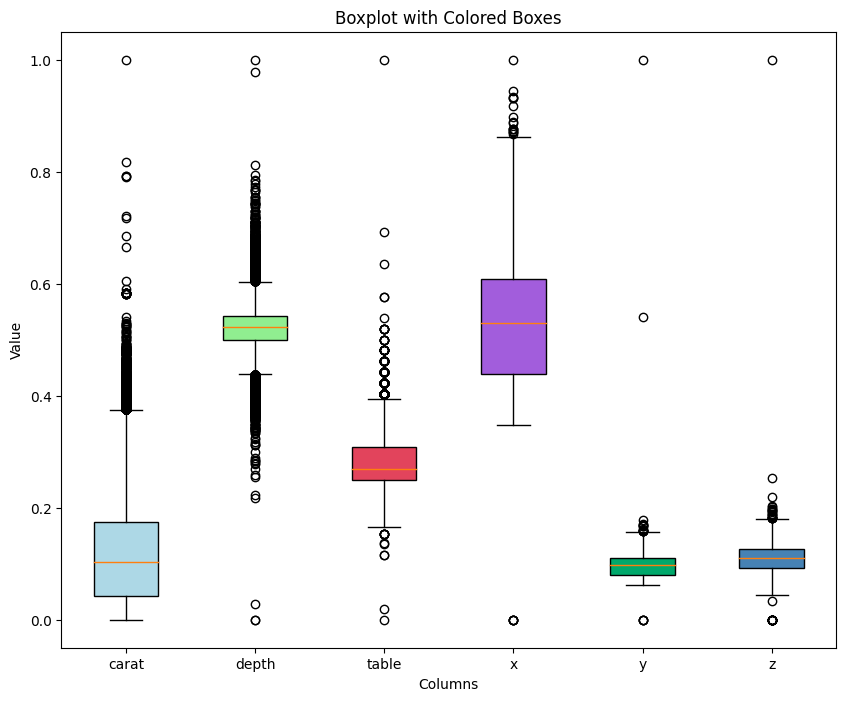

In [ ]:
boxplot_colors = ['lightblue', 'lightgreen', '#E2445C', '#A25DDC', '#00A86B', '#4682B4', 'lightblue']

fig, ax = plt.subplots(figsize=(10,8))

bp = ax.boxplot(normalized_data, patch_artist=True)

for patch, color in zip(bp['boxes'], boxplot_colors):
    patch.set_facecolor(color)


ax.set_xticks(range(1, len(columns_to_plot) + 1), columns_to_plot)
ax.set_xlabel('Columns')
ax.set_ylabel('Value')
ax.set_title('Boxplot with Colored Boxes')
plt.show()

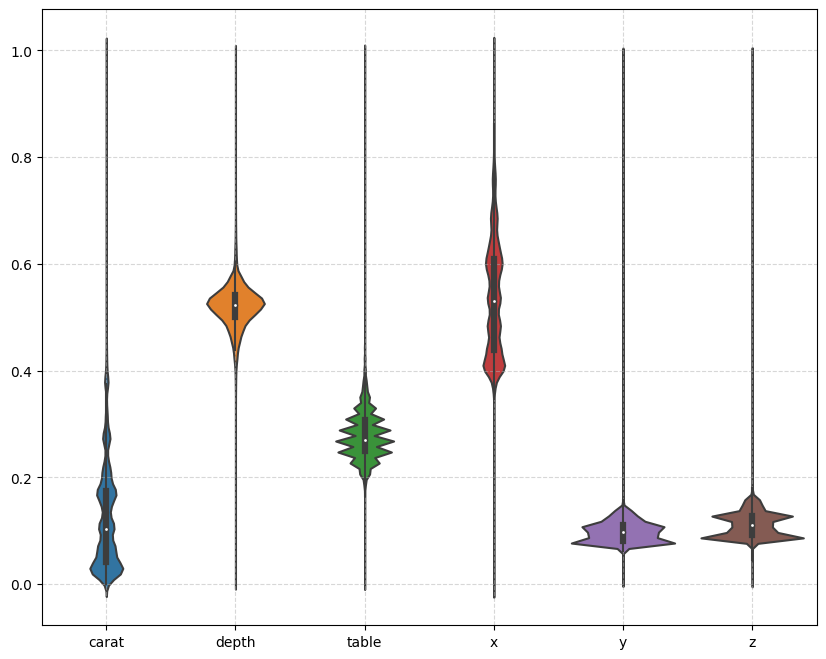

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(normalized_data)
plt.grid(True, linestyle='--', alpha=0.5) 

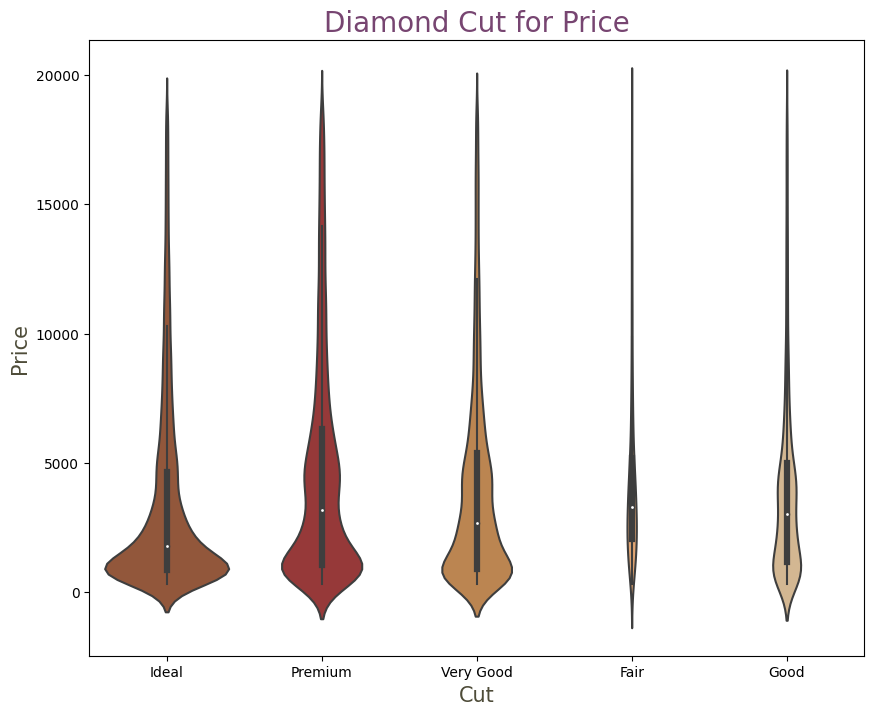

In [ ]:
plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

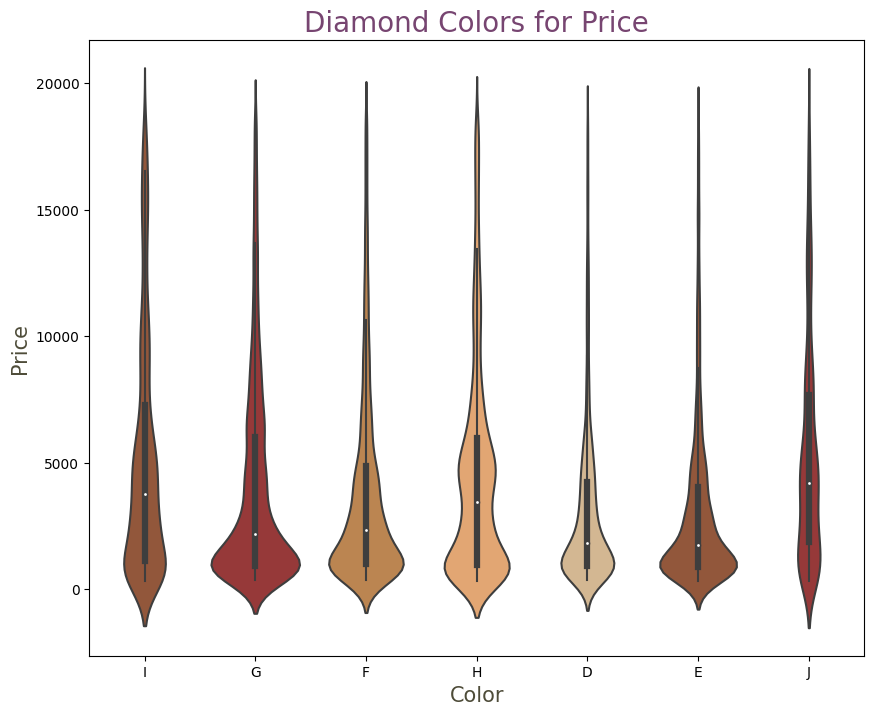

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="color",y="price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

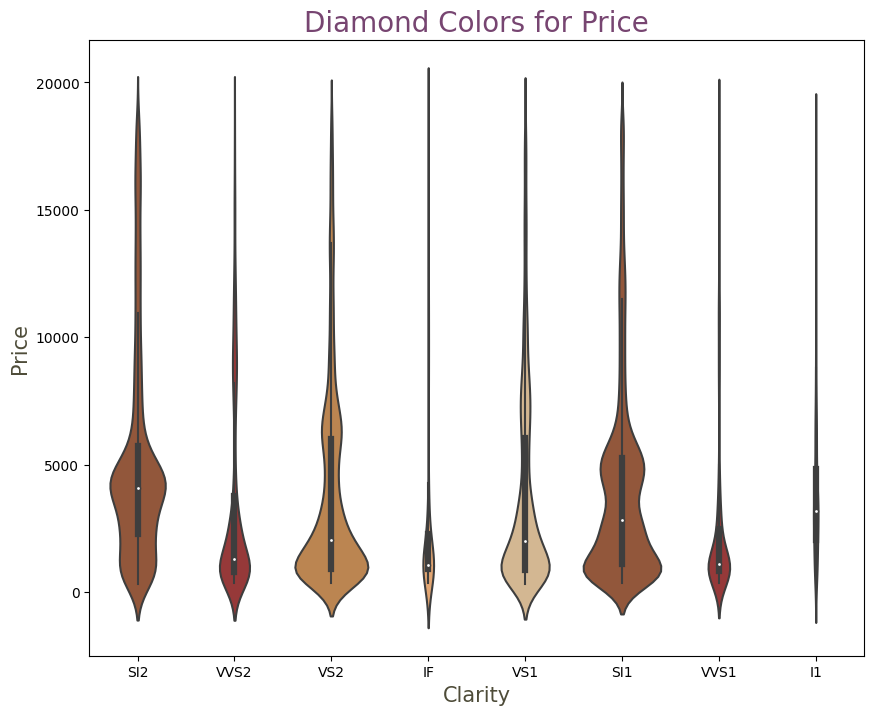

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(x="clarity",y="price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

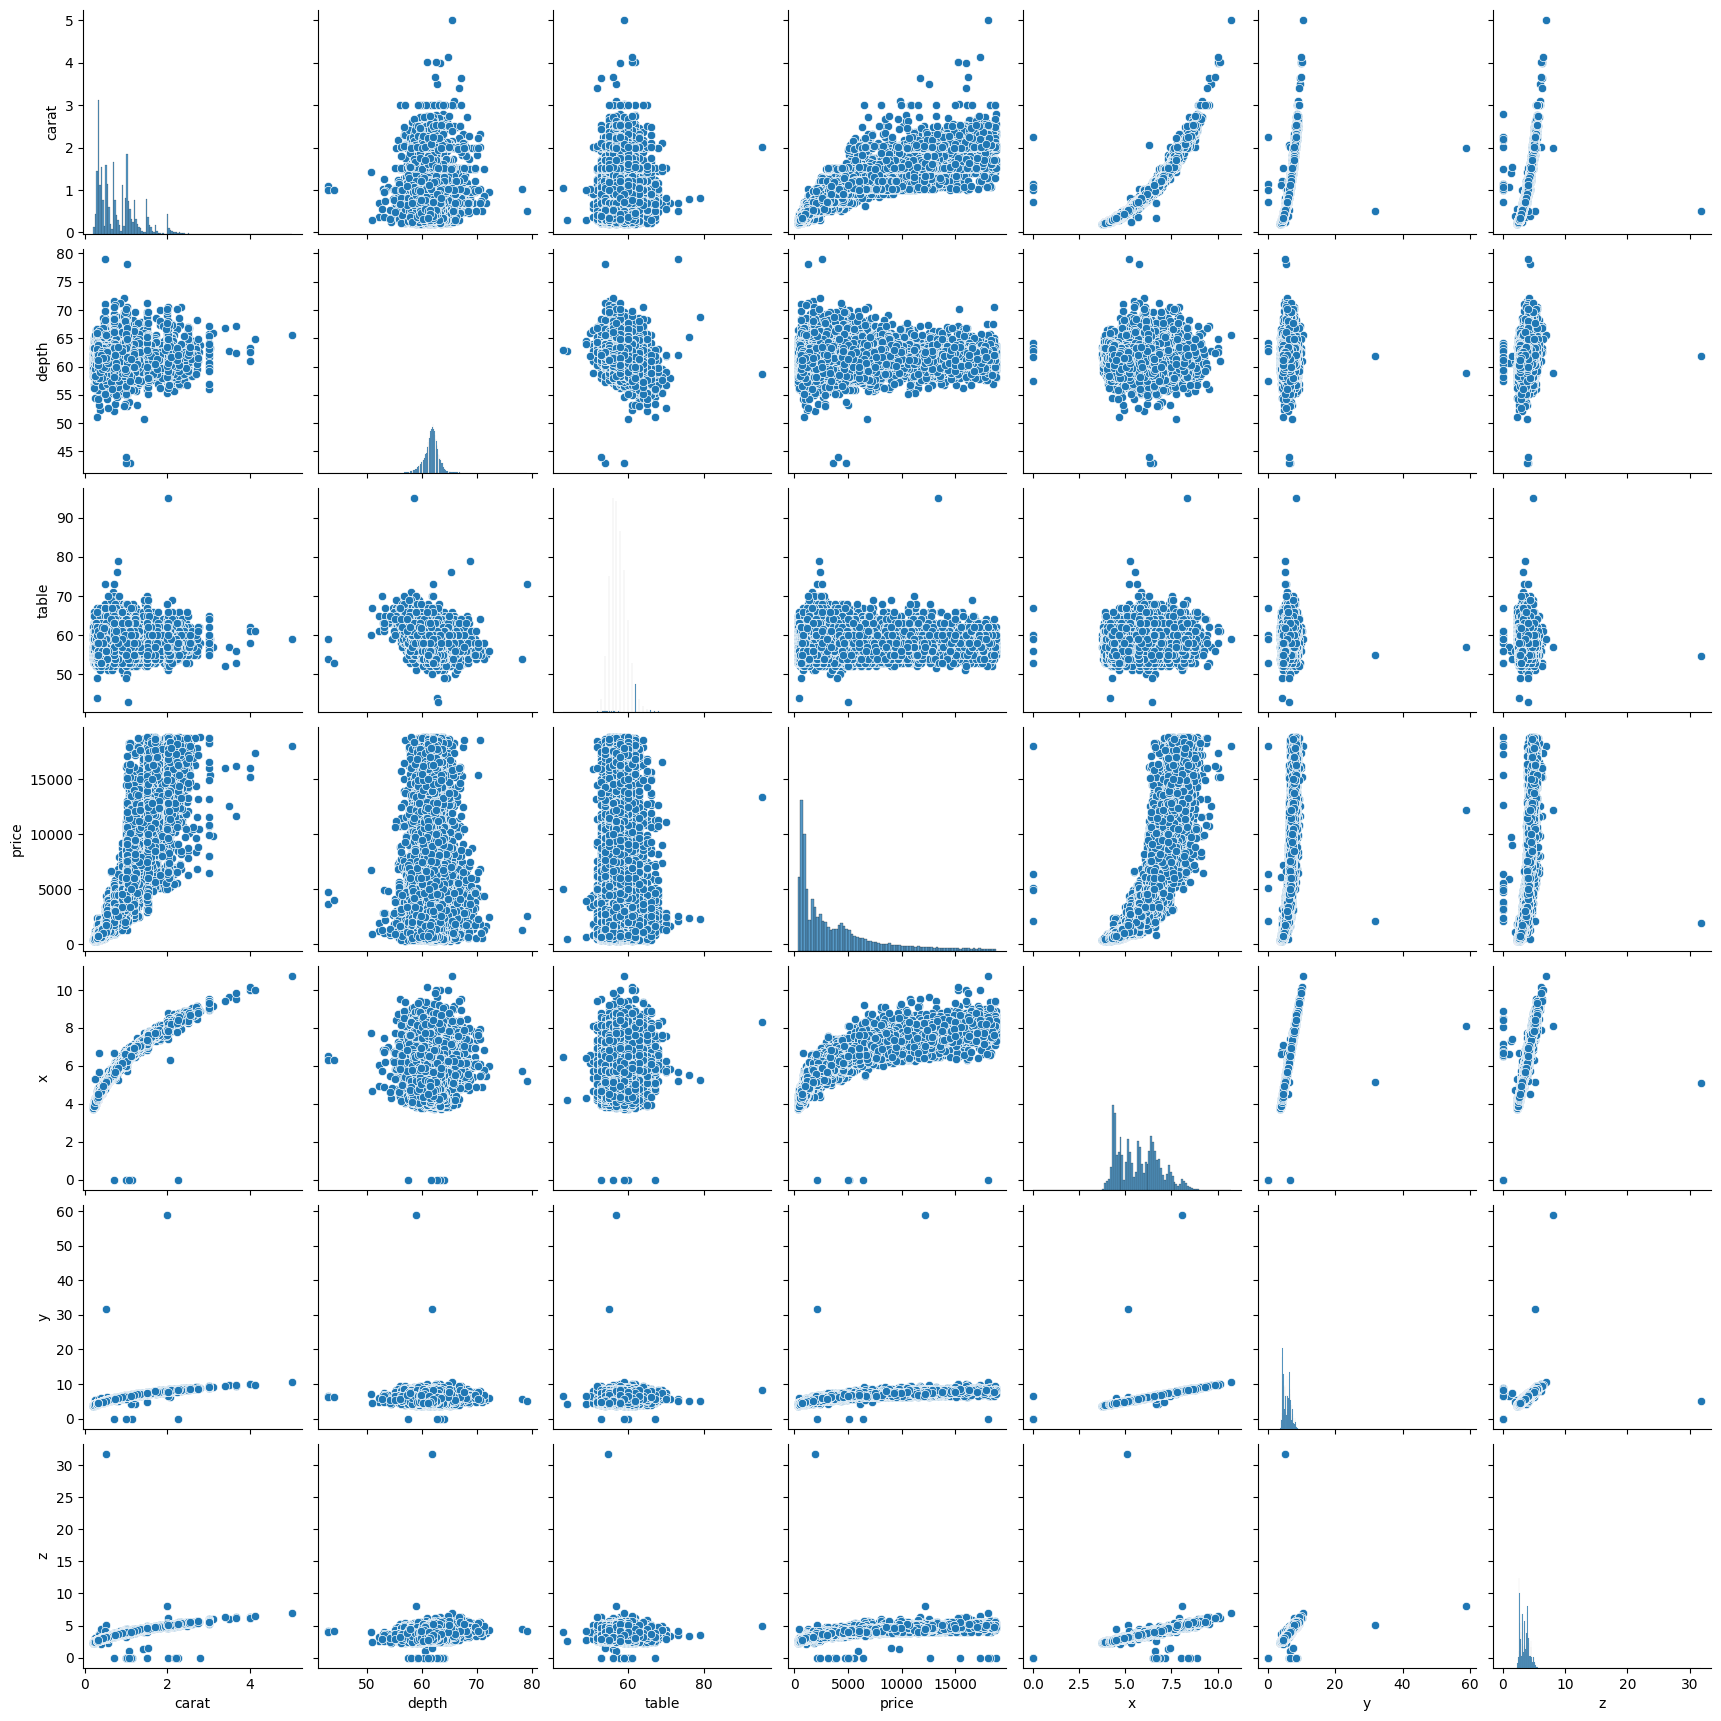

In [ ]:
sns.pairplot(data)

## Data Preprocessing

### Data Cleaning


In [ ]:
xmean = data['x'].mean()
ymean = data['y'].mean()
zmean = data['z'].mean()
data.loc[data["x"] == 0, "x"] = xmean
data.loc[data["y"] == 0, "y"] = ymean
data.loc[data["z"] == 0, "z"] = zmean

In [ ]:
data.describe()

carat         depth         table         price             x  \
count  43152.000000  43152.000000  43152.000000  43152.000000  43152.000000   
mean       0.797855     61.747177     57.458347   3929.491912      5.732232   
std        0.473594      1.435454      2.233904   3985.527795      1.119580   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    947.750000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5312.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  43152.000000  43152.000000  
mean       5.735549      3.539962  
std        1.147481      0.704745  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [ ]:
def remove_outliers_iqr(df, columns, k=1.5):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numerical_columns = data.select_dtypes(include=np.number).columns

data_no_outliers = remove_outliers_iqr(data, numerical_columns)

In [ ]:
data_no_outliers.shape

(37213, 10)

In [ ]:
#duplicates = data_no_outliers.duplicated().sum()
#data_no_duplicates = data_no_outliers.drop_duplicates()

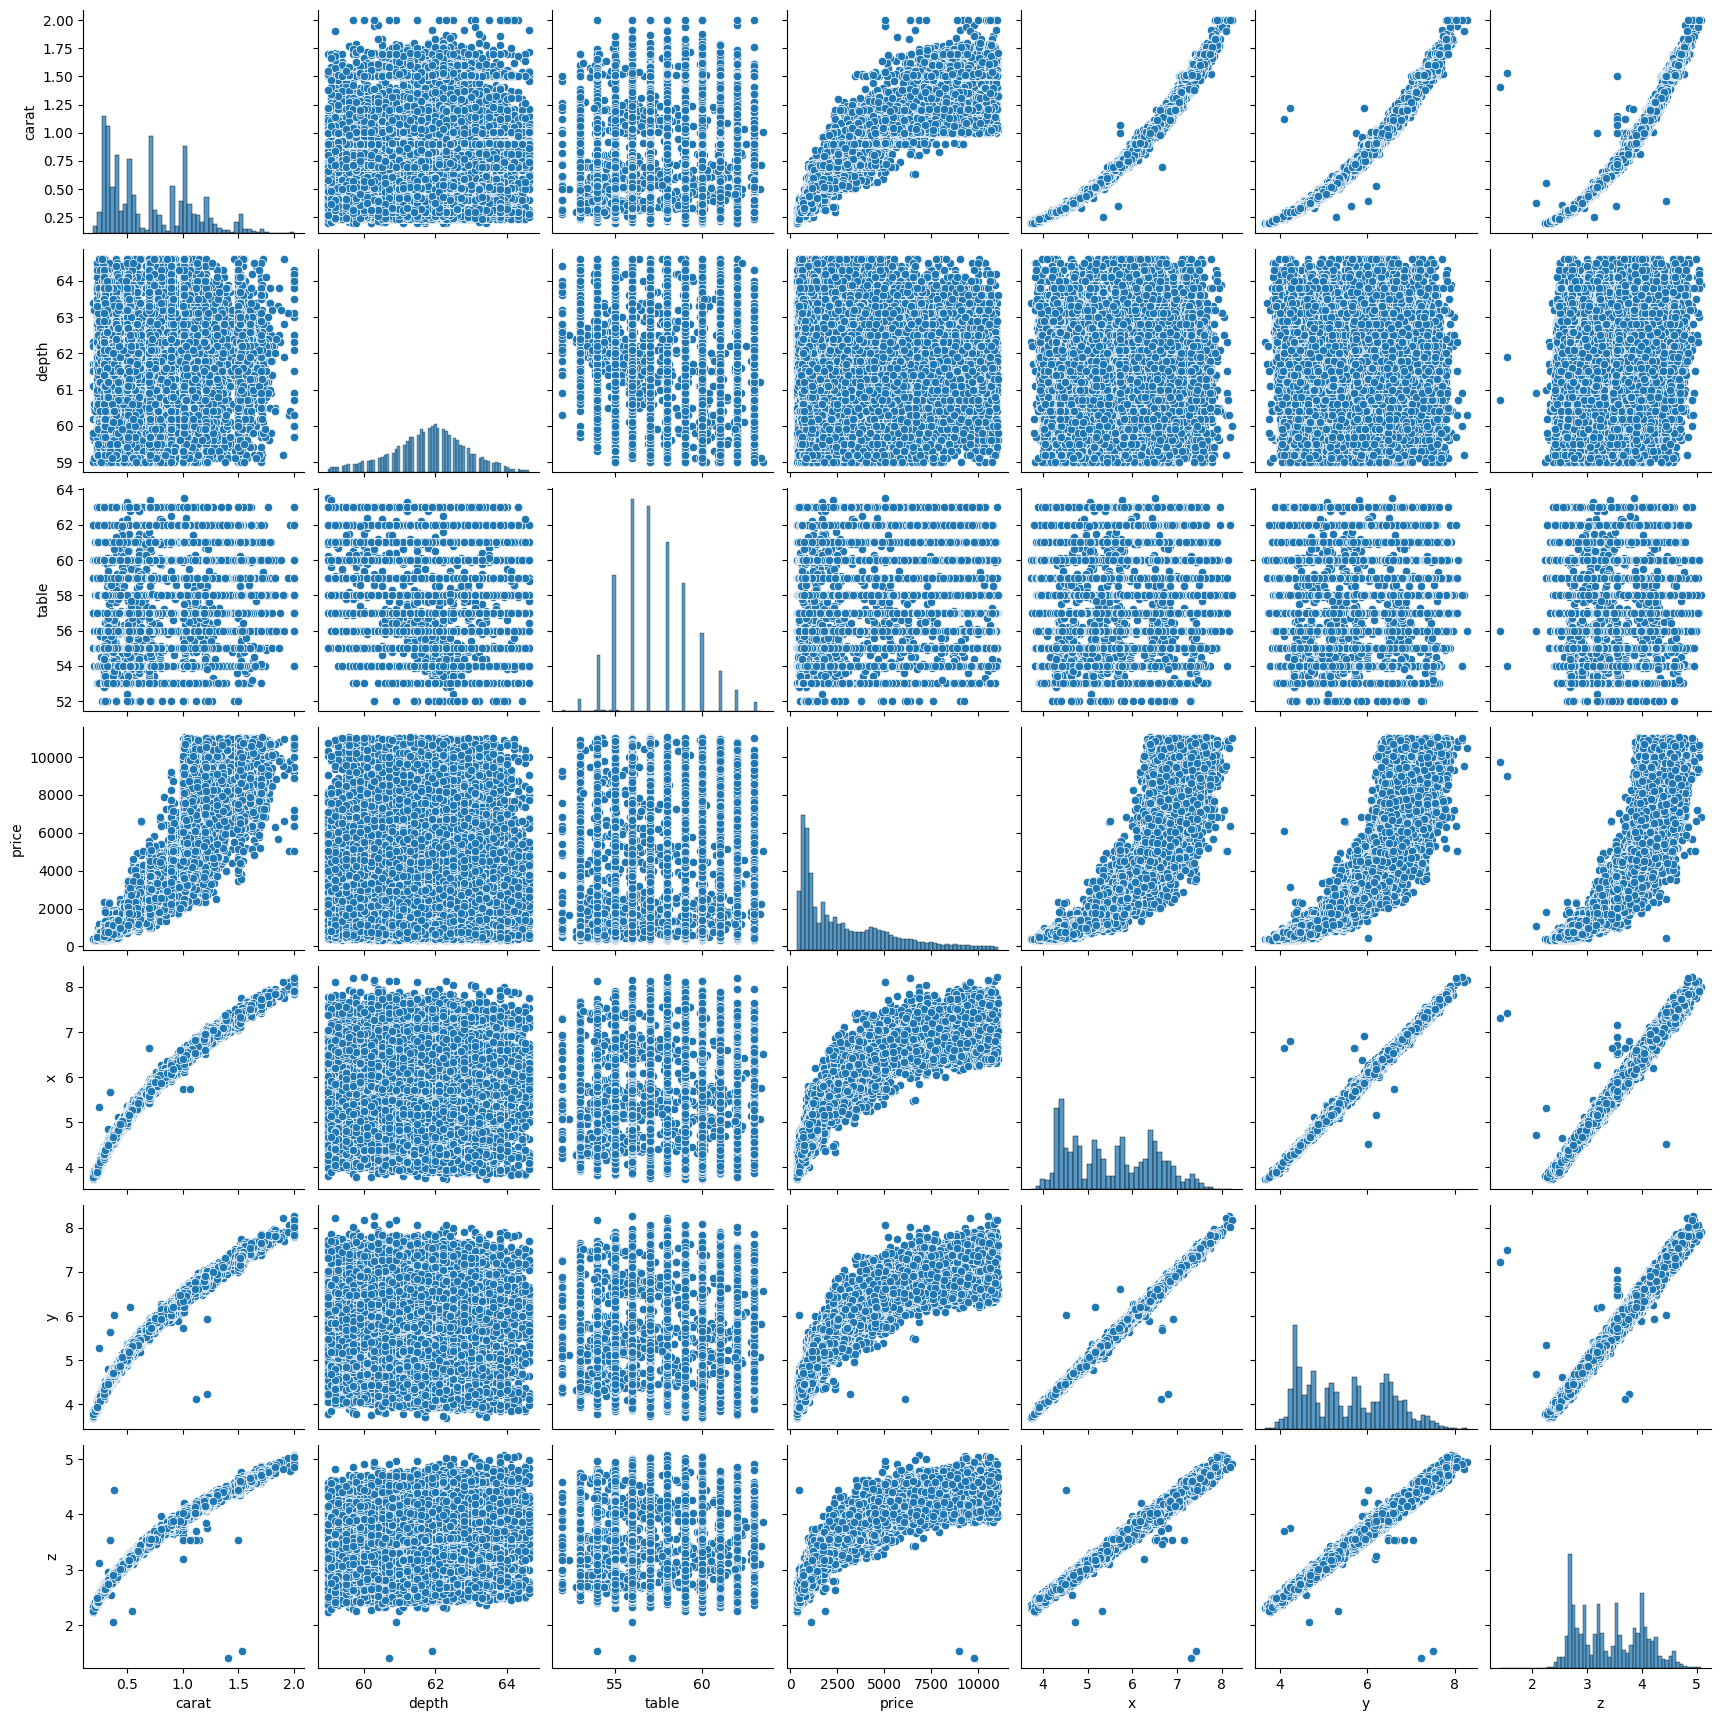

In [ ]:
sns.pairplot(data_no_outliers)

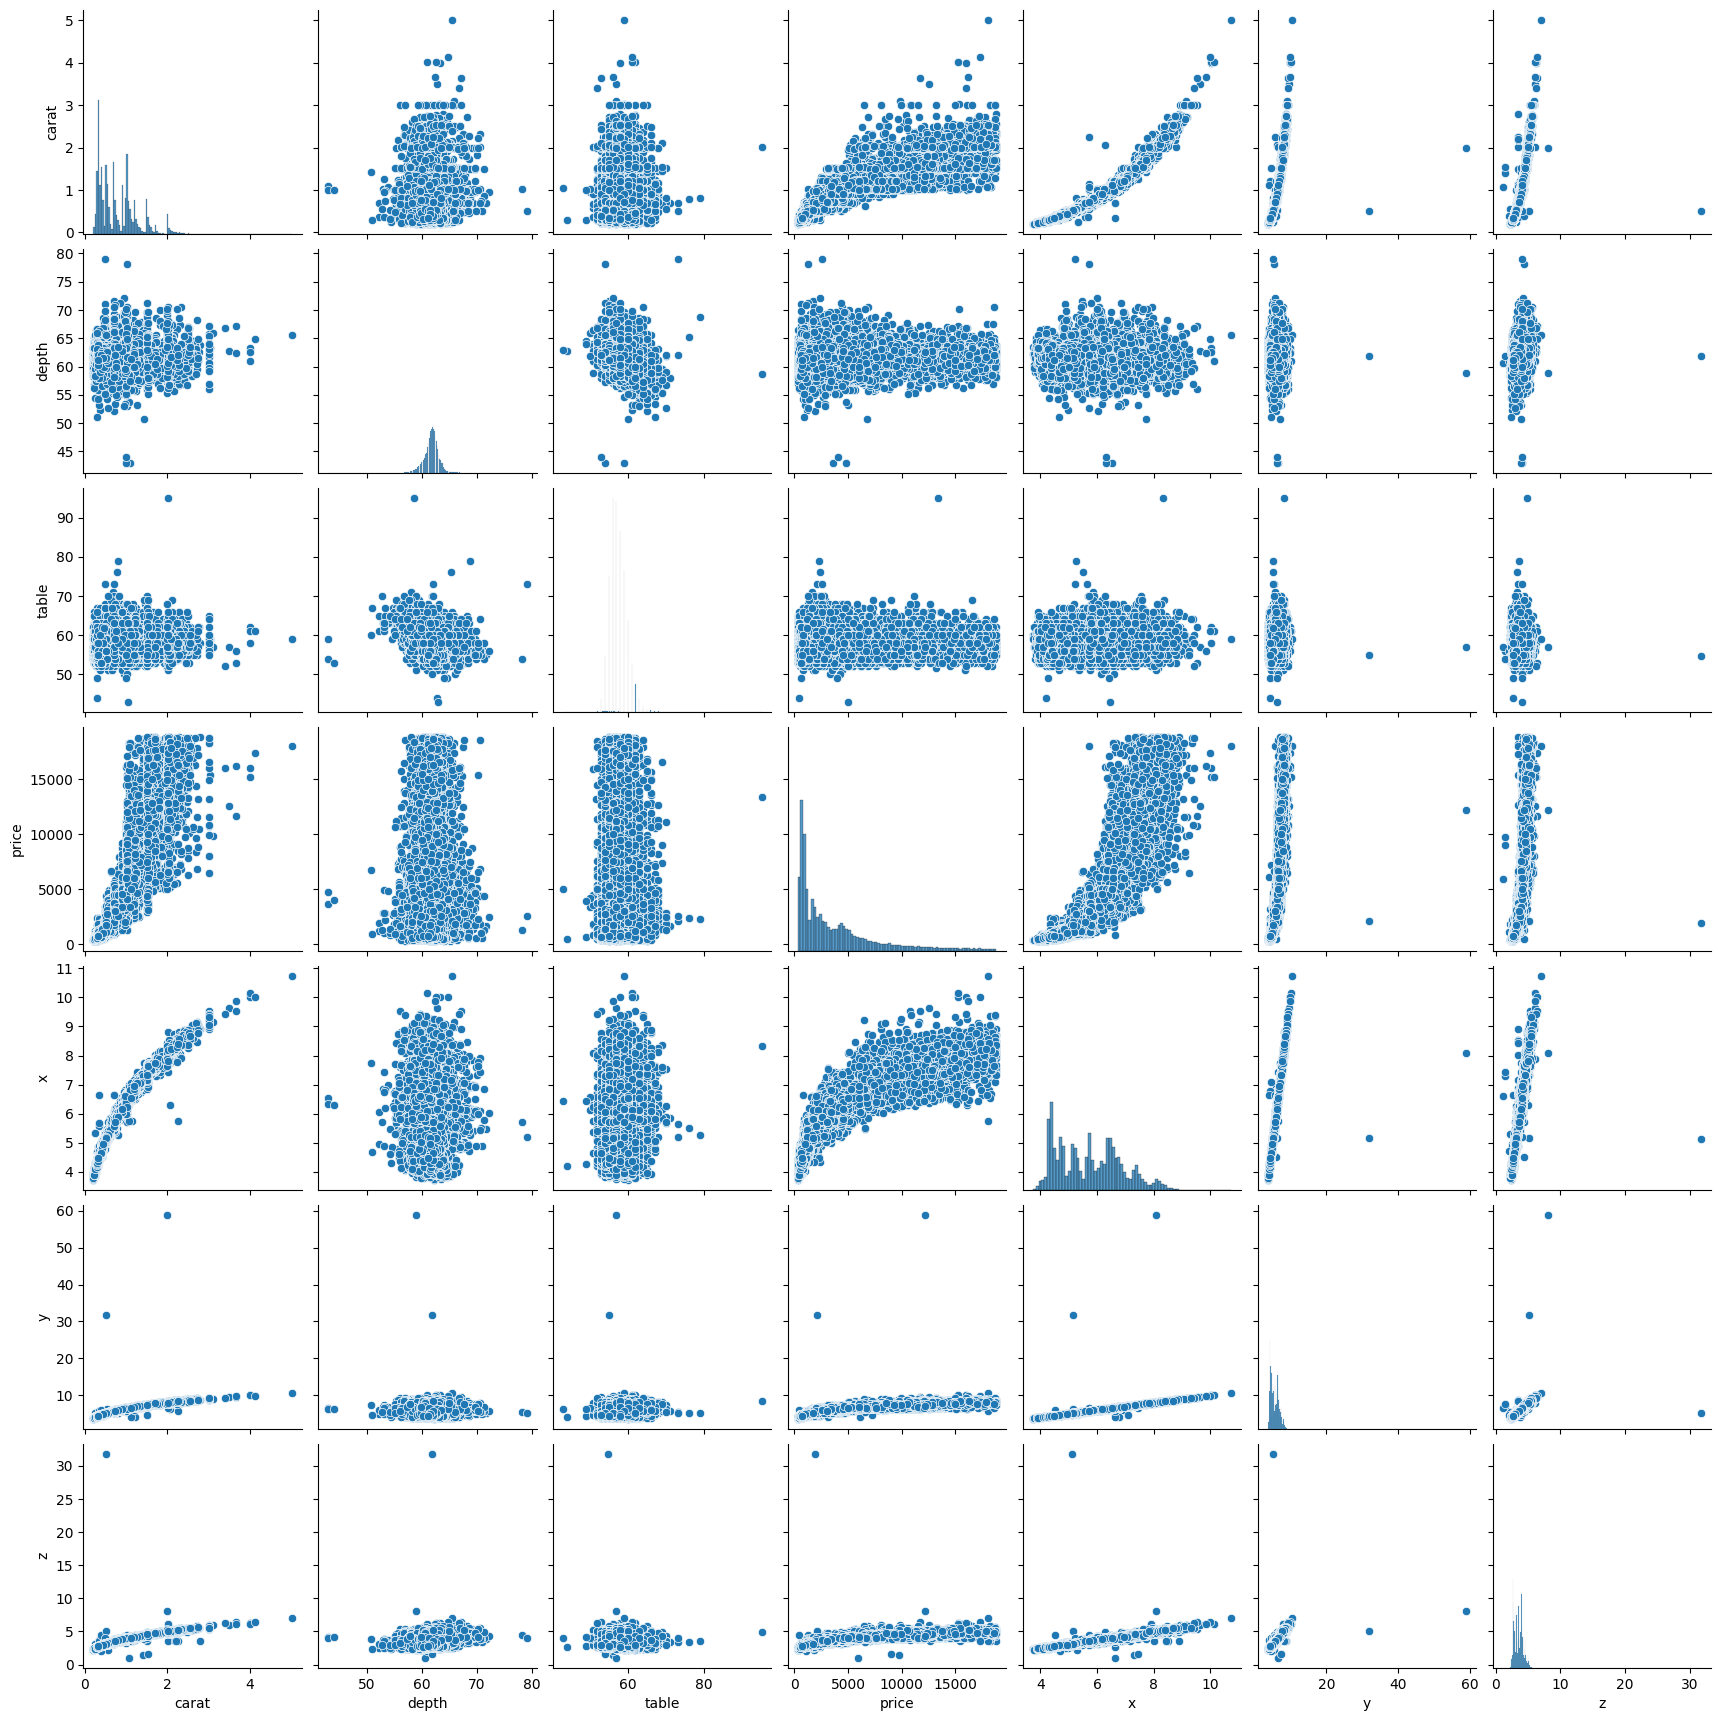

In [ ]:
sns.pairplot(data)

In [ ]:
columns_to_normalize = data_no_outliers.drop(columns = ['cut', 'color', 'clarity','price'])
normalized_data = (columns_to_normalize - columns_to_normalize.min()) / (columns_to_normalize.max() - columns_to_normalize.min())
columns_to_plot = data_no_outliers.columns.drop(['cut', 'color', 'clarity','price'])

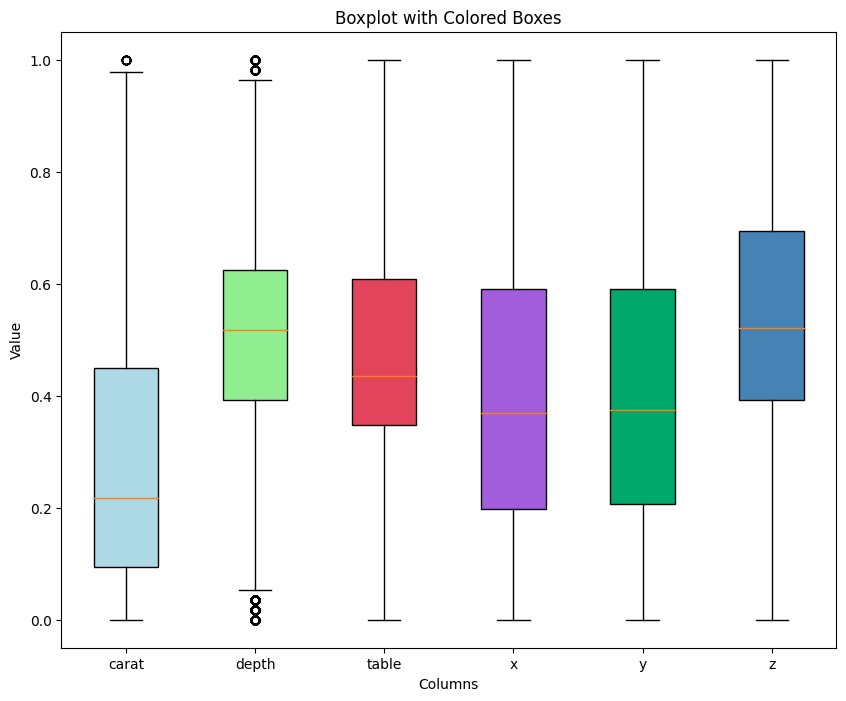

In [ ]:
boxplot_colors = ['lightblue', 'lightgreen', '#E2445C', '#A25DDC', '#00A86B', '#4682B4', 'lightblue']

# Creating a figure and axis
fig, ax = plt.subplots(figsize=(10,8))

# Plotting the boxplots with custom colors
bp = ax.boxplot(normalized_data, patch_artist=True)

# Applying colors to the boxplot patches
for patch, color in zip(bp['boxes'], boxplot_colors):
    patch.set_facecolor(color)

# Setting labels and title

ax.set_xticks(range(1, len(columns_to_plot) + 1), columns_to_plot)
ax.set_xlabel('Columns')
ax.set_ylabel('Value')
ax.set_title('Boxplot with Colored Boxes')
plt.show()

<ipython-input-31-b73da79246a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_no_outliers.corr()


<Axes: >

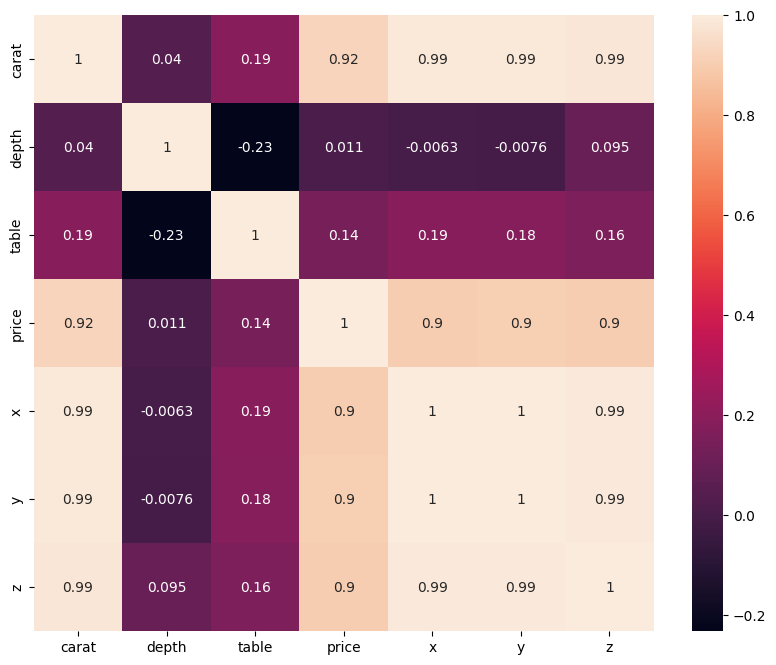

In [ ]:
plt.figure(figsize=(10,8))
corr = data_no_outliers.corr()
sns.heatmap(corr, annot=True)

### Feature Engineering


In [ ]:
data_no_outliers['volume']=data_no_outliers['x']*data_no_outliers['y']*data_no_outliers['z']
data_no_outliers

carat        cut color clarity  depth  table  price     x     y     z  \
0       1.06      Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07   
2       0.32      Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71   
3       0.53      Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19   
4       0.70    Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50   
5       0.90  Very Good     G      IF   63.1   58.0   5670  6.18  6.09  3.87   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
43147   0.52      Ideal     E     VS2   61.5   56.0   1760  5.16  5.18  3.18   
43148   0.72  Very Good     D     VS2   62.1   59.0   3016  5.70  5.73  3.55   
43149   0.44    Premium     I    VVS1   61.5   58.0    990  4.95  4.87  3.02   
43150   0.31    Premium     E     VS1   60.2   58.0    734  4.38  4.43  2.65   
43151   0.33      Ideal     G     VS2   61.2   55.0    743  4.49  4.46  2.74   

           volume  
0      176.483340  
2       52.943373  
3       86.422842  
4      115.315200  
5      145.652094  
...           ...  
43147   84.997584  
43148  115.946550  
43149   72.801630  
43150   51.419010  
43151   54.869596  

[37213 rows x 11 columns]

In [ ]:
data_no_outliers.drop(['x', 'y', 'z'], axis = 1, inplace=True)
data_no_outliers

carat        cut color clarity  depth  table  price      volume
0       1.06      Ideal     I     SI2   61.8   57.0   4270  176.483340
2       0.32      Ideal     F     VS2   61.3   56.0    828   52.943373
3       0.53      Ideal     G     VS2   61.2   56.0   1577   86.422842
4       0.70    Premium     H    VVS2   61.0   57.0   2596  115.315200
5       0.90  Very Good     G      IF   63.1   58.0   5670  145.652094
...      ...        ...   ...     ...    ...    ...    ...         ...
43147   0.52      Ideal     E     VS2   61.5   56.0   1760   84.997584
43148   0.72  Very Good     D     VS2   62.1   59.0   3016  115.946550
43149   0.44    Premium     I    VVS1   61.5   58.0    990   72.801630
43150   0.31    Premium     E     VS1   60.2   58.0    734   51.419010
43151   0.33      Ideal     G     VS2   61.2   55.0    743   54.869596

[37213 rows x 8 columns]

##Model Building

###Preparing Training & Validation Data

In [ ]:
std_data = data_no_outliers.copy()
std_data

carat        cut color clarity  depth  table  price      volume
0       1.06      Ideal     I     SI2   61.8   57.0   4270  176.483340
2       0.32      Ideal     F     VS2   61.3   56.0    828   52.943373
3       0.53      Ideal     G     VS2   61.2   56.0   1577   86.422842
4       0.70    Premium     H    VVS2   61.0   57.0   2596  115.315200
5       0.90  Very Good     G      IF   63.1   58.0   5670  145.652094
...      ...        ...   ...     ...    ...    ...    ...         ...
43147   0.52      Ideal     E     VS2   61.5   56.0   1760   84.997584
43148   0.72  Very Good     D     VS2   62.1   59.0   3016  115.946550
43149   0.44    Premium     I    VVS1   61.5   58.0    990   72.801630
43150   0.31    Premium     E     VS1   60.2   58.0    734   51.419010
43151   0.33      Ideal     G     VS2   61.2   55.0    743   54.869596

[37213 rows x 8 columns]

In [ ]:
train_set, validation_set = train_test_split(std_data, test_size = 0.1, random_state = 42)

In [ ]:
train_set

carat        cut color clarity  depth  table  price      volume
8669    0.50      Ideal     E    VVS2   62.2   54.0   2889   82.450432
10742   0.96  Very Good     I     VS2   59.6   59.0   4187  155.566872
15670   1.41       Good     H     VS2   63.8   60.0   9088  226.564096
40938   0.33      Ideal     E     VS1   61.1   56.0    850   54.425280
20369   1.01    Premium     H     VS2   61.5   59.0   5400  167.800248
...      ...        ...   ...     ...    ...    ...    ...         ...
19530   0.30      Ideal     G    VVS2   62.2   55.0    878   49.782876
7263    0.31      Ideal     G    VVS1   62.0   55.0    789   51.207660
13069   1.23      Ideal     H     SI1   61.5   57.0   6681  202.634900
990     1.08  Very Good     G    VVS2   63.1   56.0   7862  176.911854
18302   0.30  Very Good     F      IF   62.1   57.0    886   48.725880

[33491 rows x 8 columns]

In [ ]:
validation_set

carat        cut color clarity  depth  table  price      volume
14805   0.59    Premium     G    VVS2   62.8   54.0   2040   97.646172
31577   0.33      Ideal     E    VVS1   60.9   56.0   1052   54.347776
6438    0.30    Premium     G    VVS2   61.8   59.0    878   47.100264
7418    0.59      Ideal     G    VVS2   62.2   56.0   2283   96.313910
8926    0.30  Very Good     G    VVS2   62.7   56.0    684   48.975392
...      ...        ...   ...     ...    ...    ...    ...         ...
28333   0.71  Very Good     D     SI1   61.7   59.0   2693  115.494540
2061    1.01  Very Good     G     VS2   62.5   57.0   5679  162.664320
38042   0.71      Ideal     D     VS2   61.2   55.0   4029  117.115516
32130   0.95  Very Good     G     SI2   62.6   58.0   4194  149.143708
7294    1.24      Ideal     I     SI1   61.1   60.0   5976  202.851342

[3722 rows x 8 columns]

In [ ]:
diamonds = train_set.drop('price', axis = 1)
diamonds_labels = train_set['price'].copy()

In [ ]:
X_validation = validation_set.drop(['price'], axis = 1)
y_validation = validation_set['price'].copy()
y_validation

14805    2040
31577    1052
6438      878
7418     2283
8926      684
         ... 
28333    2693
2061     5679
38042    4029
32130    4194
7294     5976
Name: price, Length: 3722, dtype: int64

###Preparing Test Data

In [ ]:
test_set = pd.read_csv('/content/test.csv')
test_set

Id  carat        cut color clarity  depth  table     x     y     z
0          1   0.34      Ideal     G    VVS2   61.1   57.0  4.52  4.48  2.75
1          2   0.71    Premium     E     VS2   62.7   58.0  5.74  5.68  3.58
2          3   0.44  Very Good     I     VS1   62.8   56.0  4.83  4.88  3.05
3          4   0.81    Premium     E     SI2   60.1   59.0  6.09  6.03  3.65
4          5   0.40      Ideal     G    VVS1   61.2   56.0  4.74  4.80  2.92
...      ...    ...        ...   ...     ...    ...    ...   ...   ...   ...
10783  10784   0.57      Ideal     H     VS1   60.9   56.0  5.34  5.36  3.26
10784  10785   1.05      Ideal     G     VS2   60.8   57.0  6.65  6.58  4.02
10785  10786   0.71      Ideal     E    VVS1   62.3   55.0  5.68  5.72  3.55
10786  10787   1.11    Premium     E     SI2   61.0   60.0  6.68  6.66  4.07
10787  10788   2.00    Premium     F     SI2   61.5   59.0  8.03  7.95  4.92

[10788 rows x 10 columns]

In [ ]:
test_set = test_set.drop(['Id'], axis=1)
test_set

carat        cut color clarity  depth  table     x     y     z
0       0.34      Ideal     G    VVS2   61.1   57.0  4.52  4.48  2.75
1       0.71    Premium     E     VS2   62.7   58.0  5.74  5.68  3.58
2       0.44  Very Good     I     VS1   62.8   56.0  4.83  4.88  3.05
3       0.81    Premium     E     SI2   60.1   59.0  6.09  6.03  3.65
4       0.40      Ideal     G    VVS1   61.2   56.0  4.74  4.80  2.92
...      ...        ...   ...     ...    ...    ...   ...   ...   ...
10783   0.57      Ideal     H     VS1   60.9   56.0  5.34  5.36  3.26
10784   1.05      Ideal     G     VS2   60.8   57.0  6.65  6.58  4.02
10785   0.71      Ideal     E    VVS1   62.3   55.0  5.68  5.72  3.55
10786   1.11    Premium     E     SI2   61.0   60.0  6.68  6.66  4.07
10787   2.00    Premium     F     SI2   61.5   59.0  8.03  7.95  4.92

[10788 rows x 9 columns]

In [ ]:
xmean = test_set['x'].mean()
ymean = test_set['y'].mean()
zmean = test_set['z'].mean()
test_set.loc[test_set["x"] == 0, "x"] = xmean
test_set.loc[test_set["y"] == 0, "y"] = ymean
test_set.loc[test_set["z"] == 0, "z"] = zmean

In [ ]:
test_set['volume']=test_set['x']*test_set['y']*test_set['z']
test_set

carat        cut color clarity  depth  table     x     y     z  \
0       0.34      Ideal     G    VVS2   61.1   57.0  4.52  4.48  2.75   
1       0.71    Premium     E     VS2   62.7   58.0  5.74  5.68  3.58   
2       0.44  Very Good     I     VS1   62.8   56.0  4.83  4.88  3.05   
3       0.81    Premium     E     SI2   60.1   59.0  6.09  6.03  3.65   
4       0.40      Ideal     G    VVS1   61.2   56.0  4.74  4.80  2.92   
...      ...        ...   ...     ...    ...    ...   ...   ...   ...   
10783   0.57      Ideal     H     VS1   60.9   56.0  5.34  5.36  3.26   
10784   1.05      Ideal     G     VS2   60.8   57.0  6.65  6.58  4.02   
10785   0.71      Ideal     E    VVS1   62.3   55.0  5.68  5.72  3.55   
10786   1.11    Premium     E     SI2   61.0   60.0  6.68  6.66  4.07   
10787   2.00    Premium     F     SI2   61.5   59.0  8.03  7.95  4.92   

           volume  
0       55.686400  
1      116.719456  
2       71.889720  
3      134.037855  
4       66.435840  
...           ...  
10783   93.309024  
10784  175.903140  
10785  115.338080  
10786  181.069416  
10787  314.085420  

[10788 rows x 10 columns]

In [ ]:
test_set.drop(['x', 'y', 'z'], axis = 1, inplace=True)
test_set

carat        cut color clarity  depth  table      volume
0       0.34      Ideal     G    VVS2   61.1   57.0   55.686400
1       0.71    Premium     E     VS2   62.7   58.0  116.719456
2       0.44  Very Good     I     VS1   62.8   56.0   71.889720
3       0.81    Premium     E     SI2   60.1   59.0  134.037855
4       0.40      Ideal     G    VVS1   61.2   56.0   66.435840
...      ...        ...   ...     ...    ...    ...         ...
10783   0.57      Ideal     H     VS1   60.9   56.0   93.309024
10784   1.05      Ideal     G     VS2   60.8   57.0  175.903140
10785   0.71      Ideal     E    VVS1   62.3   55.0  115.338080
10786   1.11    Premium     E     SI2   61.0   60.0  181.069416
10787   2.00    Premium     F     SI2   61.5   59.0  314.085420

[10788 rows x 7 columns]

### Building a Pipeline System

In [ ]:
std_data_final_num = diamonds.drop(['cut', 'color', 'clarity'], axis = 1)
std_data_final_num

carat  depth  table      volume
8669    0.50   62.2   54.0   82.450432
10742   0.96   59.6   59.0  155.566872
15670   1.41   63.8   60.0  226.564096
40938   0.33   61.1   56.0   54.425280
20369   1.01   61.5   59.0  167.800248
...      ...    ...    ...         ...
19530   0.30   62.2   55.0   49.782876
7263    0.31   62.0   55.0   51.207660
13069   1.23   61.5   57.0  202.634900
990     1.08   63.1   56.0  176.911854
18302   0.30   62.1   57.0   48.725880

[33491 rows x 4 columns]

In [ ]:
std_data_final_cat = diamonds[['cut', 'color', 'clarity']]
std_data_final_cat

cut color clarity
8669       Ideal     E    VVS2
10742  Very Good     I     VS2
15670       Good     H     VS2
40938      Ideal     E     VS1
20369    Premium     H     VS2
...          ...   ...     ...
19530      Ideal     G    VVS2
7263       Ideal     G    VVS1
13069      Ideal     H     SI1
990    Very Good     G    VVS2
18302  Very Good     F      IF

[33491 rows x 3 columns]

In [ ]:
num_attribs = list(std_data_final_num)
cat_attribs = list(std_data_final_cat)

num_pipeline = Pipeline([('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([('ordinal_encoder', OrdinalEncoder())])

full_pipeline = ColumnTransformer([('num_pipeline', num_pipeline, num_attribs),
                          ('cat_pipeline', cat_pipeline, cat_attribs)])

std_data_final_prepared = full_pipeline.fit_transform(diamonds)
X_validation_prepared = full_pipeline.transform(X_validation)
test_set_prepared = full_pipeline.transform(test_set)

### Models Fitting

In [ ]:
lin_reg = Pipeline([('lin_reg', LinearRegression())])
dt_reg = Pipeline([('dt_reg', DecisionTreeRegressor())])
rf_reg = Pipeline([('rf_reg', RandomForestRegressor())])
xgb_reg = Pipeline([('xgb_reg', XGBRegressor())])
ada_reg = Pipeline([('ada_reg', AdaBoostRegressor())])
knn_reg = Pipeline([('knn_reg', KNeighborsRegressor())])
#svm_reg = Pipeline([('svm_reg', SVR)])

pipelines = [lin_reg, dt_reg, rf_reg, xgb_reg, ada_reg, knn_reg]

for pipe in pipelines:
  pipe.fit(std_data_final_prepared, diamonds_labels)

In [ ]:
pipe_dict = {0:'lin_reg', 1:'dt_reg', 2:'rf_reg', 3:'xgb_reg', 4:'ada_reg', 5:'knn_reg'}
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, std_data_final_prepared,diamonds_labels,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

lin_reg: -874.464835 
dt_reg: -477.118308 
rf_reg: -358.424331 
xgb_reg: -347.875526 
ada_reg: -851.232438 
knn_reg: -514.835900 


### Performance Measures

In [ ]:
# Model prediction on test data
pred = xgb_reg.predict(X_validation_prepared)

# Model Evaluation
print("R^2:",metrics.r2_score(y_validation, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_validation, pred))*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_validation, pred))
print("MSE:",metrics.mean_squared_error(y_validation, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_validation, pred)))

R^2: 0.9827086712673173
Adjusted R^2: 0.9826760812562433
MAE: 195.58516031026457
MSE: 114590.99740568285
RMSE: 338.51292058898264


###Making Predictions

In [ ]:
predictions = xgb_reg.predict(test_set_prepared)

In [ ]:
submission = pd.DataFrame()
submission['Id'] = range(1, len(test_set) + 1)
submission

Id
0          1
1          2
2          3
3          4
4          5
...      ...
10783  10784
10784  10785
10785  10786
10786  10787
10787  10788

[10788 rows x 1 columns]

In [ ]:
submission['price'] = (predictions)
submission

Id         price
0          1    802.184814
1          2   2825.085693
2          3    819.715820
3          4   2718.211914
4          5   1165.020996
...      ...           ...
10783  10784   1691.686768
10784  10785   6744.023438
10785  10786   4319.855957
10786  10787   4554.989258
10787  10788  10145.343750

[10788 rows x 2 columns]

In [ ]:
submission.to_csv('diamonds_prediction_xgb.csv', index=False)

In [ ]:
s = pd.read_csv('/content/diamonds_prediction_xgb.csv')
s

Id       price
0          1    802.1848
1          2   2825.0857
2          3    819.7158
3          4   2718.2120
4          5   1165.0210
...      ...         ...
10783  10784   1691.6868
10784  10785   6744.0234
10785  10786   4319.8560
10786  10787   4554.9893
10787  10788  10145.3440

[10788 rows x 2 columns]

###Saving the Model

In [ ]:
joblib.dump(xgb_reg, 'model_xgb.pkl')

['model_xgb.pkl']

##Hyperparameters Tuning

###Exploring Model Parameters

In [ ]:
xgb_reg = make_pipeline(full_pipeline, XGBRegressor())
xgb_reg.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('num_pipeline',
                                    Pipeline(steps=[('std_scaler',
                                                     StandardScaler())]),
                                    ['carat', 'depth', 'table', 'volume']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('ordinal_encoder',
                                                     OrdinalEncoder())]),
                                    ['cut', 'color', 'clarity'])])),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=N

###Model Fitting

In [ ]:
params = {
  'xgbregressor__n_estimators': [100, 500, 1000],
  "xgbregressor__learning_rate": (0.1, 0.01, 0.001), 
  "xgbregressor__max_depth": [ 3, 5, 7]
  }

xgb_reg_pipeline = make_pipeline(full_pipeline, XGBRegressor())
grid_pipeline = GridSearchCV(xgb_reg_pipeline,params, cv=5, scoring = 'neg_mean_squared_error', error_score='raise', return_train_score = True, verbose = 3)
grid_pipeline.fit(diamonds, diamonds_labels)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=3, xgbregressor__n_estimators=100;, score=(train=-164744.461, test=-188925.666) total time=   2.2s
[CV 2/5] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=3, xgbregressor__n_estimators=100;, score=(train=-173151.620, test=-170794.766) total time=   0.9s
[CV 3/5] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=3, xgbregressor__n_estimators=100;, score=(train=-169598.528, test=-172348.229) total time=   2.7s
[CV 4/5] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=3, xgbregressor__n_estimators=100;, score=(train=-168848.429, test=-179757.728) total time=   0.9s
[CV 5/5] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=3, xgbregressor__n_estimators=100;, score=(train=-167882.305, test=-181779.551) total time=   0.9s
[CV 1/5] END xgbregressor__learning_rate=0.1, xgbregressor__max_depth=3, xgbregressor__n_esti

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['carat',
                                                                          'depth',
                                                                          'table',
                                                                          'volume']),
                                                                        ('cat_pipeline',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['cut',
                                                                          'color',
                                                                          'clarity'])])),
                                       ('xgbregressor',
                                        XGBRegressor(b...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...))]),
             param_grid={'xgbregressor__learning_rate': (0.1, 0.01, 0.001),
                         'xgbregressor__max_depth': [3, 5, 7],
                         'xgbregressor__n_estimators': [100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

###Exploring Tunning Results

In [ ]:
grid_pipeline.best_params_

{'xgbregressor__learning_rate': 0.1,
 'xgbregressor__max_depth': 7,
 'xgbregressor__n_estimators': 100}

In [ ]:
grid_pipeline.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'volume']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsa...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [ ]:
cvres = grid_pipeline.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
  print(np.sqrt(-mean_score), params)

422.7542880867978 {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 100}
364.1311579995536 {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 500}
357.3299892402826 {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 1000}
354.2990127295555 {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 5, 'xgbregressor__n_estimators': 100}
343.68696800709495 {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 5, 'xgbregressor__n_estimators': 500}
346.6882718122504 {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 5, 'xgbregressor__n_estimators': 1000}
341.200711784295 {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 7, 'xgbregressor__n_estimators': 100}
343.6282290629609 {'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 7, 'xgbregressor__n_estimators': 500}
349.01202057060675 {'xgbregressor__lea

In [ ]:
best_estimator = grid_pipeline.best_estimator_
xgb = best_estimator.named_steps['xgbregressor']
feature_importances = xgb.feature_importances_
feature_importances

array([0.5644226 , 0.00202273, 0.00177365, 0.32538083, 0.00508316,
       0.04197868, 0.05933832], dtype=float32)

In [ ]:
ode = OrdinalEncoder()
num_attribs = list(train_set.drop(["cut", "color", "clarity"],axis = 1).columns)
cat_ode_attribs = list(ode.categories)
attributes = num_attribs + cat_ode_attribs
sorted(zip(feature_importances,attributes),reverse = True)

[(0.5644226, 'carat'),
 (0.32538083, 'price'),
 (0.059338316, 'u'),
 (0.041978676, 'a'),
 (0.0050831614, 'volume'),
 (0.0020227346, 'depth'),
 (0.0017736495, 'table')]

In [ ]:
final_model = grid_pipeline.best_estimator_

###Making Predictions

In [ ]:
final_predictions = final_model.predict(test_set)

In [ ]:
submission = pd.DataFrame()
submission['Id'] = range(1, len(test_set) + 1)
submission

Id
0          1
1          2
2          3
3          4
4          5
...      ...
10783  10784
10784  10785
10785  10786
10786  10787
10787  10788

[10788 rows x 1 columns]

In [ ]:
submission['price'] = (final_predictions)
submission

Id         price
0          1    816.294006
1          2   2884.649658
2          3    858.045959
3          4   2852.385254
4          5   1118.298584
...      ...           ...
10783  10784   1697.165283
10784  10785   6632.102539
10785  10786   4271.702637
10786  10787   4665.960449
10787  10788  10028.945312

[10788 rows x 2 columns]

In [ ]:
submission.to_csv('diamonds_prediction_tuned.csv', index=False)

In [ ]:
s = pd.read_csv('/content/diamonds_prediction_tuned.csv')
s

Id        price
0          1    816.29400
1          2   2884.64970
2          3    858.04596
3          4   2852.38530
4          5   1118.29860
...      ...          ...
10783  10784   1697.16530
10784  10785   6632.10250
10785  10786   4271.70260
10786  10787   4665.96040
10787  10788  10028.94500

[10788 rows x 2 columns]

###Saving the Model

In [ ]:
joblib.dump(final_model, 'model_xgb_tuned.pkl')

['model_xgb_tuned.pkl']